In [5]:

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/sealevel.csv')
#Data can be accessed here: https://github.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/blob/main/fcc-forum-pageviews.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


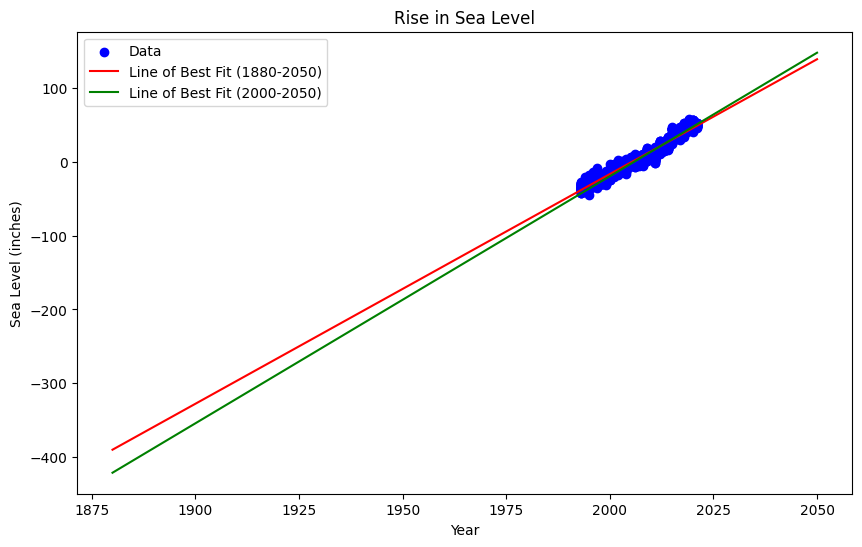

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Import the data from epa-sea-level.csv
df = pd.read_csv("/content/drive/My Drive/sealevel.csv")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["Year"], df["GMSL_noGIA"], label="Data", color="b")

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(df["Year"], df["GMSL_noGIA"])
years = list(range(1880, 2051))
line = [(slope * year) + intercept for year in years]

# Plot the line of best fit
plt.plot(years, line, label="Line of Best Fit (1880-2050)", color="r")

# Calculate the line of best fit for data since 2000
df_recent = df[df["Year"] >= 2000]
slope_recent, intercept_recent, _, _, _ = linregress(df_recent["Year"], df_recent["GMSL_noGIA"])
line_recent = [(slope_recent * year) + intercept_recent for year in years]

# Plot the line of best fit for data since 2000
plt.plot(years, line_recent, label="Line of Best Fit (2000-2050)", color="g")

# Set labels and title
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")

# Add legend
plt.legend()

# Save the plot and return it
plt.savefig("sea_level_rise.png")
plt.show()